<span style="color:#929591">Chapter 4.
# <span style="color:#820747">Flight Delays Prediction 2018. MultiClass Classification Problem.

<img src="img/pl3.jpg">

<span style="color:#610023">In this part of my project I will work on Classification problem again but this time I will try to <b>predict length of delay in 4 different ranges</b>. I was trying to do 8 ranges but accuracy is not too good. That why I decided stick with 4 different ranges of time. The idea why I'm trying to do classification that because my Regression does not perform the way I want to. First step I will do the simillar way categorical variables like in chapter 3 for the Regression problem, and I will use models such as <b>LogisticRegression, DessisionTreeClassifire and RandomForestClassifire</b> to predict one of the group. I decided focus more on delays in group number 3 and 4, as I am more interesting in delays more than 15 minutes.

# <span style="color:#a83c09">Navigator:

<b>[Dictionary](img/dictionary.txt)

<b>[1. EDA](./Chapter-1-EDA.ipynb)

<b>[2. Delay. Prediction | Classification problem](./Chapter-2-features-creation-classification problem.ipynb)

<b>[3. Length of Delay. Prediction | Regression problem](./Chapter-3-regression_problem.ipynb)

<img src="img/lin.jpg">

# <span style="color:#a83c09">Chapter Structure:

A. <b>Null Values Dropping and Features Selection.</b><br>
         
B. <b>Tuning of Target and Predictors.</b><br>

         1. Target: How big the delay.
         2. Predictor: Day of the Week.
         3. Predictor: Airline Code.
         4. Predictor: Tail Number.
         5. Predictor: Flight Number.
         6. Predictor: Origin Airport.
         7. Predictor: State Origin.
         8. Predictor: State Destination.
         9. Predictor: Departure Time.
         10. Predictor: Arrival Time.
         11. Predictor: Scheduled Length of Flight Time.
         12. Predictor: Distance of the Flight.
         
C. <b>Categorical Variables into Dummies.</b><br>

D. <b>Check for Multicollinearity.</b><br>

E. <b>Models Building.</b><br>

         1. Separation: Features and Target Splitting.
         2. Standardization: All data into same scale.
         3. Split: Train | Test.
         4. Model: LogisticRegression.
            - GridSearch for LogisticRegression.
            - Fit Best Parameters into my Model.
            - Confusion Matrix and Classification Report for LR Model.
         5. Model: DecisionTreeClassifier.
            - GridSearch for DecisionTreeClassifier.
            - Fit Best Parameters into my Model.
            - Confusion Matrix and Classification Report for DT Model.
            - Features Importance for DT model.
            - Tree Visualisation for DT model.
         6. Model: RandomForestClassifier.
            - GridSearch for RandomForestClassifier.
            - Fit Best Parameters into my RF Model.
            - Confusion Matrix and Classification Report for RF Model.
            - Features Importance.
         7. Conclusion.
            

<img src="img/lin.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Loading libraries which I will use during fourth part of the project. I will use same models from sklearn as in Chapter 3 when I was predicting delay on arrival or not delay. 

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import itertools

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import datetime, warnings, scipy 

# <span style="color:#040273">Part A. Null Values Dropping and Features Selection

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I am prediction intervals of delays on arrival. Also I want to know about possible delays before plane start moving from the gate in departure airport. In this case I can use only information which not related to how long plane was moving to runway or how long plane was in the air, etc.

In [135]:
# Load my dataset and check shape with columns name. 
# ________________________________________________________
df = pd.read_csv('1_full_file_ready_to_slice.csv', low_memory=False)
print('Number of records and columns: ',df.shape)
print('----------------------------------------------------------')
print('Columns: ',df.columns)

Number of records and columns:  (570007, 45)
----------------------------------------------------------
Columns:  Index(['Unnamed: 0', 'ID', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE_CODE', 'AIRLINE', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'DATE',
       'ORIGIN_AIRPORT', 'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN',
       'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'DESTINATION_AIRPORT',
       'AIRPORT_DESTINATION', 'CITY_DESTINATION', 'STATE_DESTINATION',
       'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')


In [136]:
# Dropping unneeded columns and check for null values
# ________________________________________________________
df.drop(['Unnamed: 0', 'ID', 'YEAR', 'MONTH', 'DAY', 'AIRLINE', 'CANCELLATION_REASON', 
         'DATE', 'AIRPORT_ORIGIN', 'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION',
         'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'CITY_DESTINATION', 'DEPARTURE_TIME',
         'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'CANCELLED', 'CANCELLATION_REASON', 
         'DIVERTED', 'ELAPSED_TIME', 'AIR_TIME'], axis=1, inplace=True)

df.isnull().sum()

DAY_OF_WEEK                 0
AIRLINE_CODE                0
TAIL_NUMBER              1969
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
CITY_ORIGIN                 0
STATE_ORIGIN                0
DESTINATION_AIRPORT         0
STATE_DESTINATION           0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         17332
TAXI_OUT                17072
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY           18626
SCHEDULED_TIME              0
DISTANCE                    0
AIRLINE_DELAY          472257
WEATHER_DELAY          472257
AIR_SYSTEM_DELAY       472257
SECURITY_DELAY         472257
LATE_AIRCRAFT_DELAY    472257
dtype: int64

In [138]:
# Fill all NaN's in features related to delays with '0'. Drop all nulls.
# ________________________________________________________
where_are_NaNs = isnan(df.AIRLINE_DELAY)
df.AIRLINE_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.WEATHER_DELAY)
df.WEATHER_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.AIR_SYSTEM_DELAY)
df.AIR_SYSTEM_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.SECURITY_DELAY)
df.SECURITY_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.LATE_AIRCRAFT_DELAY)
df.LATE_AIRCRAFT_DELAY[where_are_NaNs] = 0


df = df.dropna()
print('---------------------------------------------------')
print('Number of records after NaNs droping: ',df.shape)
print('---------------------------------------------------')

---------------------------------------------------
Number of records after NaNs droping:  (550905, 21)
---------------------------------------------------


<img src="img/lin.jpg">

<b><span style="color:#610023">First my attempt was to make 8 categories instead of 4 and my Baseline was lower than 0.10.<b><br>
    
<b><span style="color:#610023">I used Intervals of Delays on Arrival:</b><br>
                              1.  2 - 10 min
                              2.  10 - 18 min
                              3.  18 - 26 min
                              4.  26 - 34 min
                              5.  34 - 50 min
                              6.  50 - 70 min
                              7.  70 - 90 min
                              8.  90 - 120 min
                           
<b><span style="color:#610023">I got result for 3 different models:<br>

                              LogisticRegression: 0.3268
                              DessisionTree: 0.3267
                              RandomForest: 0.2605
                              
<b><span style="color:#610023">But based on confusion matrix, I was getting many wrong predictions, that why I decided reduce number of ranges.<br>

<img src="img/lin.jpg">

# <span style="color:#040273">Part B. Tuning of Target and Predictors.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> In this part I will 1st set my Target variable as <b>( 1 / 2 / 3 / 4 )</b>. Each number will represent range in time of delays on Arrival.<br> 

                                1 = (2 - 8  minutes), 
                                2 = (8 - 15  minutes), 
                                3 = (15 - 45  minutes), 
                                4 = (45 - 120  minutes). 
<span style="color:#1e488f">Then I will create categorical variables and tronsforme them into dummies. 

# <span style="color:#ffad01">1. Target: <span style="color:#004577">How big the delay.

In [139]:
# I will count delays if it's more than 2 minutes.
# ________________________________________________________
df = df[df.ARRIVAL_DELAY >= 2]
df.shape

(170555, 21)

In [140]:
# As I can see mean is 40, when is max 2023. I will use range only 2 - 120 minutes.
# ________________________________________________________
df.ARRIVAL_DELAY.describe()

count    170555.000000
mean         40.990935
std          72.650309
min           2.000000
25%           8.000000
50%          19.000000
75%          45.000000
max        2023.000000
Name: ARRIVAL_DELAY, dtype: float64

In [141]:
# I will keep only delays up to 2 hrs. 
df = df[df.ARRIVAL_DELAY <= 120]
df.shape

(157948, 21)

In [142]:
# Creating my 4 categories.
# ________________________________________________________
df['Delay_interval'] =  df['ARRIVAL_DELAY'].apply(lambda x: 0 if  x < 8 else int(x))
df['Delay_interval'] =  df['Delay_interval'].apply(lambda x: 1 if x >= 8 and x < 15 else int(x))
df['Delay_interval'] =  df['Delay_interval'].apply(lambda x: 2 if x >= 15 and x < 45 else int(x))
df['Delay_interval'] =  df['Delay_interval'].apply(lambda x: 3 if x >= 45 else int(x))

In [143]:
# Check for proportions.
# ________________________________________________________
df.Delay_interval.value_counts()

2    54263
0    41404
1    31436
3    30845
Name: Delay_interval, dtype: int64

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Predictor: <span style="color:#004577">Day of the Week.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will count mean of length of delay for each day of the week and make 7 categories.

In [144]:
time_delays_by_day = df.pivot_table(index='DAY_OF_WEEK', values='ARRIVAL_DELAY', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_day)
df_xxx.reset_index(level=0, inplace=True)
df_xxx

,DAY_OF_WEEK,ARRIVAL_DELAY
0,1,28.237387
1,2,27.311503
2,3,26.011640
3,4,24.006217
4,5,27.059525
5,6,23.640680
6,7,25.333709


In [145]:
df_xxx.describe()

,DAY_OF_WEEK,ARRIVAL_DELAY
count,7.000000,7.000000
mean,4.000000,25.942951
std,2.160247,1.722953
min,1.000000,23.640680
25%,2.500000,24.669963
50%,4.000000,26.011640
75%,5.500000,27.185514
max,7.000000,28.237387


In [146]:
df_xxx['days_length_del'] =  df_xxx['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 23 and x <= 23.7 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 2 if x > 24 and x <= 25 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 3 if x > 25 and x <= 26 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 4 if x > 26 and x <= 27 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 5 if x > 27 and x <= 27.06 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 6 if x > 27.06 and x <= 28 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 7 if x > 28 else float(x))

In [147]:
df = pd.merge(df,df_xxx, on=['DAY_OF_WEEK'])
df.drop('ARRIVAL_DELAY_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Predictor: <span style="color:#004577">Airline Code.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I count mean of length of delay for each airline then I make 4 intervals. I will split for for group based on describe() information max, min, mean values. I will follow same approach for rest of my categorical features.

In [148]:
time_delays_by_airline = df.pivot_table(index='AIRLINE_CODE', values='ARRIVAL_DELAY_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_airline)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,AIRLINE_CODE,ARRIVAL_DELAY_x
0,9E,32.251547
1,AA,23.882518
2,AS,19.064572
3,B6,32.979501
4,DL,27.067780


In [149]:
df_xxx.describe()

,ARRIVAL_DELAY_x
count,18.000000
mean,26.344196
std,4.449376
min,15.355207
25%,24.497494
50%,26.513544
75%,29.024912
max,32.979501


In [150]:
df_xxx['airline_del_mean'] =  df_xxx['ARRIVAL_DELAY_x'].apply(lambda x: 1 if x > 15 and x <= 20 else int(x))
df_xxx['airline_del_mean'] =  df_xxx['airline_del_mean'].apply(lambda x: 2 if x > 20 and x <= 26 else int(x))
df_xxx['airline_del_mean'] =  df_xxx['airline_del_mean'].apply(lambda x: 3 if x > 26 and x <= 30 else int(x))
df_xxx['airline_del_mean'] =  df_xxx['airline_del_mean'].apply(lambda x: 4 if x > 30 and x <= 33 else int(x))

In [151]:
df = pd.merge(df,df_xxx, on=['AIRLINE_CODE'])
df.drop('ARRIVAL_DELAY_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Predictor: <span style="color:#004577">Tail Number.

In [152]:
time_delays_by_tail = df.pivot_table(index='TAIL_NUMBER', values='ARRIVAL_DELAY_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_tail)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,TAIL_NUMBER,ARRIVAL_DELAY_x_x
0,215NV,31.400000
1,216NV,26.738095
2,217NV,11.885714
3,218NV,44.687500
4,219NV,27.586207


In [153]:
df_xxx.describe()

,ARRIVAL_DELAY_x_x
count,5188.000000
mean,26.017686
std,9.007034
min,2.000000
25%,20.139725
50%,25.269231
75%,30.896053
max,112.000000


In [154]:
df_xxx['tail_del_mean'] =  df_xxx['ARRIVAL_DELAY_x_x'].apply(lambda x: 1 if x > 1 and x <= 28 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 2 if x > 28 and x <= 56 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 3 if x > 56 and x <= 84 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 4 if x > 84 and x <= 113 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 1 if x == 28 else int(x))

In [155]:
df = pd.merge(df,df_xxx, on=['TAIL_NUMBER'])
df.drop('ARRIVAL_DELAY_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Predictor: <span style="color:#004577">Flight Number.

In [156]:
time_delays_by_flight = df.pivot_table(index='FLIGHT_NUMBER', values='ARRIVAL_DELAY_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_flight)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,FLIGHT_NUMBER,ARRIVAL_DELAY_x_x_x
0,1,27.868421
1,2,28.657895
2,3,28.650000
3,4,24.558824
4,5,19.190476


In [157]:
df_xxx.describe()

,FLIGHT_NUMBER,ARRIVAL_DELAY_x_x_x
count,6703.000000,6703.000000
mean,3397.335671,26.074615
std,1987.543175,10.276940
min,1.000000,2.000000
25%,1680.500000,20.202941
50%,3384.000000,25.333333
75%,5094.500000,30.790491
max,7439.000000,120.000000


In [158]:
df_xxx['flight_del_mean'] =  df_xxx['ARRIVAL_DELAY_x_x_x'].apply(lambda x: 1 if x > 1 and x <= 28 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 2 if x > 28 and x <= 56 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 3 if x > 56 and x <= 84 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 4 if x > 84 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 1 if x == 28 else int(x))

In [159]:
df = pd.merge(df,df_xxx, on=['FLIGHT_NUMBER'])
df.drop('ARRIVAL_DELAY_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Predictor: <span style="color:#004577">Origin Airport.

In [160]:
time_delays_by_origin_airport = df.pivot_table(index='ORIGIN_AIRPORT', values='ARRIVAL_DELAY_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_origin_airport)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,ORIGIN_AIRPORT,ARRIVAL_DELAY_x_x_x_x
0,ABE,26.324074
1,ABI,22.759259
2,ABQ,25.252315
3,ABR,17.529412
4,ABY,27.250000


In [161]:
df_xxx.describe()

,ARRIVAL_DELAY_x_x_x_x
count,332.000000
mean,26.511086
std,6.718321
min,4.250000
25%,23.072455
50%,26.525510
75%,29.799843
max,55.500000


In [162]:
df_xxx['orig_airport_del_mean'] =  df_xxx['ARRIVAL_DELAY_x_x_x_x'].apply(lambda x: 1 if x > 4 and x <= 14 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 2 if x > 14 and x <= 28 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 3 if x > 28 and x <= 42 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 4 if x > 42 and x <= 56 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 1 if x == 14 else int(x))

In [163]:
df = pd.merge(df,df_xxx, on=['ORIGIN_AIRPORT'])
df.drop('ARRIVAL_DELAY_x_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">7. Predictor: <span style="color:#004577">State Origin.

In [164]:
time_delays_by_origin_state = df.pivot_table(index='STATE_ORIGIN', values='ARRIVAL_DELAY_x_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_origin_state)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,STATE_ORIGIN,ARRIVAL_DELAY_x_x_x_x_x
0,AK,20.383367
1,AL,25.328217
2,AR,24.163575
3,AS,32.000000
4,AZ,22.231956


In [165]:
df_xxx.describe()

,ARRIVAL_DELAY_x_x_x_x_x
count,53.000000
mean,26.752914
std,3.260181
min,16.922903
25%,24.669903
50%,26.988328
75%,28.842249
max,33.400000


In [166]:
df_xxx['orig_state_del_mean'] =  df_xxx['ARRIVAL_DELAY_x_x_x_x_x'].apply(lambda x: 1 if x > 16 and x <= 20 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 2 if x > 20 and x <= 24 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 3 if x > 24 and x <= 28 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 4 if x > 28 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 1 if x == 20 else int(x))

In [167]:
df = pd.merge(df,df_xxx, on=['STATE_ORIGIN'])
df.drop('ARRIVAL_DELAY_x_x_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">8. Predictor: <span style="color:#004577">State Destination.

In [168]:
time_delays_by_dest_state = df.pivot_table(index='STATE_DESTINATION', values='ARRIVAL_DELAY_x_x_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_dest_state)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,STATE_DESTINATION,ARRIVAL_DELAY_x_x_x_x_x_x
0,AK,18.752535
1,AL,27.652031
2,AR,24.995238
3,AS,16.800000
4,AZ,26.341090


In [169]:
df_xxx.describe()

,ARRIVAL_DELAY_x_x_x_x_x_x
count,53.000000
mean,25.842684
std,3.387999
min,15.977548
25%,24.492267
50%,26.169697
75%,27.652031
max,32.274831


In [170]:
df_xxx['dest_state_del_mean'] =  df_xxx['ARRIVAL_DELAY_x_x_x_x_x_x'].apply(lambda x: 1 if x > 15 and x <= 20 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 2 if x > 20 and x <= 25 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 3 if x > 25 and x <= 30 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 4 if x > 30 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 1 if x == 20 else int(x))

In [171]:
df = pd.merge(df,df_xxx, on=['STATE_DESTINATION'])
df.drop('ARRIVAL_DELAY_x_x_x_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">9. Predictor: <span style="color:#004577">Departure Time.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will take scheduled departure hours and keep it as it is, each hour as a category. 

In [172]:
df.SCHEDULED_DEPARTURE = pd.to_datetime(df.SCHEDULED_DEPARTURE)
df['sched_hours_depart'] = df.SCHEDULED_DEPARTURE.map(lambda x: x.hour)
df['sched_hours_depart'] = df['sched_hours_depart'].apply(lambda x: 24 if x == 0 else x)

In [173]:
df.head(3)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,LATE_AIRCRAFT_DELAY,Delay_interval,days_length_del,airline_del_mean,tail_del_mean,flight_del_mean,orig_airport_del_mean,orig_state_del_mean,dest_state_del_mean,sched_hours_depart
0,1,EV,N614QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-08 09:43:00,...,61.0,3,7.0,4,2,1,2,3,2,9
1,2,EV,N611QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-16 09:43:00,...,0.0,0,6.0,4,2,1,2,3,2,9
2,1,EV,N614QX,2856,BTR,Baton Rouge,LA,DFW,TX,2018-01-29 08:05:00,...,0.0,3,7.0,4,2,1,2,3,2,8


<img src="img/lin.jpg">

# <span style="color:#ffad01">10. Predictor: <span style="color:#004577">Arrival Time.

In [174]:
df.SCHEDULED_ARRIVAL = pd.to_datetime(df.SCHEDULED_ARRIVAL)
df['sched_hours_arrival'] = df.SCHEDULED_ARRIVAL.map(lambda x: x.hour)
df['sched_hours_arrival'] = df['sched_hours_arrival'].apply(lambda x: 24 if x == 0 else x)

<img src="img/lin.jpg">

# <span style="color:#ffad01">11. Predictor: <span style="color:#004577">Scheduled Length of Flight Time.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">For the scheduled time I will create category for each unique value of length of time and store it in "scheduled_time_numeric" column.

In [175]:
df = df.sort_values('SCHEDULED_TIME')
print(df.SCHEDULED_TIME.head(5))
print('-----------------')
df['scheduled_time_numeric'] = pd.factorize(df.SCHEDULED_TIME)[0] + 1
print(df.scheduled_time_numeric.head(5))

104838    22.0
104834    22.0
157713    23.0
157714    23.0
157715    23.0
Name: SCHEDULED_TIME, dtype: float64
-----------------
104838    1
104834    1
157713    2
157714    2
157715    2
Name: scheduled_time_numeric, dtype: int64


<img src="img/lin.jpg">

# <span style="color:#ffad01">12. Predictor: <span style="color:#004577">Distance of the Flight.

In [176]:
time_delays_by_distance = df.pivot_table(index='DISTANCE', values='ARRIVAL_DELAY_x_x_x_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_distance)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,DISTANCE,ARRIVAL_DELAY_x_x_x_x_x_x_x
0,31.0,19.416667
1,66.0,45.348837
2,67.0,36.485380
3,68.0,48.166667
4,69.0,35.823529


In [177]:
df_xxx.describe()

,DISTANCE,ARRIVAL_DELAY_x_x_x_x_x_x_x
count,1389.000000,1389.000000
mean,1054.351332,25.715920
std,749.952643,7.082676
min,31.000000,3.666667
25%,486.000000,21.690141
50%,901.000000,25.381250
75%,1447.000000,29.129032
max,4983.000000,85.500000


In [178]:
df_xxx['distance_del_mean'] =  df_xxx['ARRIVAL_DELAY_x_x_x_x_x_x_x'].apply(lambda x: 1 if x > 3 and x <= 24 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 2 if x > 24 and x <= 45 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 3 if x > 45 and x <= 66 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 4 if x > 66 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 1 if x == 24 else int(x))

In [179]:
df = pd.merge(df,df_xxx, on=['DISTANCE'])
df.drop('ARRIVAL_DELAY_x_x_x_x_x_x_x_y', axis=1, inplace=True)
df.head(2)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,airline_del_mean,tail_del_mean,flight_del_mean,orig_airport_del_mean,orig_state_del_mean,dest_state_del_mean,sched_hours_depart,sched_hours_arrival,scheduled_time_numeric,distance_del_mean
0,3,OO,N779CA,4781,GRR,Grand Rapids,MI,MSP,MN,2018-01-10 13:20:00,...,3,1,2,3,4,3,13,12,1,2
1,1,OO,N675BR,4781,GRR,Grand Rapids,MI,MSP,MN,2018-01-08 13:20:00,...,3,2,2,3,4,3,13,12,1,2


<img src="img/lin.jpg">

# <span style="color:#004577">Part C. Categorical Variables into Dummies. 

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Now all my categorical variables are ready. I do dummies features from them, and delete categorical variables as I dont need them anymore. I use get_dummies method from pandas library to get dummies. Also I set prefix to easy understanding later where this features come from.

In [180]:
#1
df = pd.concat([df, pd.get_dummies(df.days_length_del, drop_first=True, prefix='day_of_week')], axis=1)
df.drop('days_length_del', axis=1, inplace=True)
#2
df = pd.concat([df, pd.get_dummies(df.airline_del_mean, drop_first=True, prefix='airline_code')], axis=1)
df.drop('airline_del_mean', axis=1, inplace=True)
#3
df = pd.concat([df, pd.get_dummies(df.tail_del_mean, drop_first=True, prefix='flight_tail_group')], axis=1)
df.drop('tail_del_mean', axis=1, inplace=True)
#4
df = pd.concat([df, pd.get_dummies(df.flight_del_mean, drop_first=True, prefix='flight_number_group')], axis=1)
df.drop('flight_del_mean', axis=1, inplace=True)
#5
df = pd.concat([df, pd.get_dummies(df.orig_airport_del_mean, drop_first=True, prefix='origin_airport_group')], axis=1)
df.drop('orig_airport_del_mean', axis=1, inplace=True)
#6
df = pd.concat([df, pd.get_dummies(df.orig_state_del_mean, drop_first=True, prefix='state_orig')], axis=1) 
df.drop('orig_state_del_mean', axis=1, inplace=True)
#7
df = pd.concat([df, pd.get_dummies(df.dest_state_del_mean, drop_first=True, prefix='state_dest')], axis=1)
df.drop('dest_state_del_mean', axis=1, inplace=True)
#8
df = pd.concat([df, pd.get_dummies(df.sched_hours_depart, drop_first=True, prefix='time_dep_group')], axis=1)
df.drop('sched_hours_depart', axis=1, inplace=True)
#9
df = pd.concat([df, pd.get_dummies(df.sched_hours_arrival, drop_first=True, prefix='time_arr_group')], axis=1)
df.drop('sched_hours_arrival', axis=1, inplace=True)
#10
df = pd.concat([df, pd.get_dummies(df.scheduled_time_numeric, drop_first=True, prefix='flight_duration')], axis=1)
df.drop('scheduled_time_numeric', axis=1, inplace=True)
# df = pd.concat([df, pd.get_dummies(df.sched_time_del_mean, drop_first=True, prefix='sched_lenth_of_time')], axis=1)
# df.drop('sched_time_del_mean', axis=1, inplace=True)
#11
df = pd.concat([df, pd.get_dummies(df.distance_del_mean, drop_first=True, prefix='distanece_group')], axis=1)
df.drop('distance_del_mean', axis=1, inplace=True)

df.rename(columns={'ARRIVAL_DELAY_x_x_x_x_x_x_x_x':'ARRIVAL_DELAY'}, inplace=True)
df.head(5)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,flight_duration_440,flight_duration_441,flight_duration_442,flight_duration_443,flight_duration_444,flight_duration_445,flight_duration_446,distanece_group_2,distanece_group_3,distanece_group_4
0,3,OO,N779CA,4781,GRR,Grand Rapids,MI,MSP,MN,2018-01-10 13:20:00,...,0,0,0,0,0,0,0,1,0,0
1,1,OO,N675BR,4781,GRR,Grand Rapids,MI,MSP,MN,2018-01-08 13:20:00,...,0,0,0,0,0,0,0,1,0,0
2,1,YV,N905J,5881,DFW,Dallas-Fort Worth,TX,JAN,MS,2018-01-01 18:00:00,...,0,0,0,0,0,0,0,1,0,0
3,4,YV,N913FJ,5879,DFW,Dallas-Fort Worth,TX,JAN,MS,2018-01-18 17:35:00,...,0,0,0,0,0,0,0,1,0,0
4,7,YV,N248LR,5879,DFW,Dallas-Fort Worth,TX,JAN,MS,2018-01-14 17:35:00,...,0,0,0,0,0,0,0,1,0,0


<img src="img/lin.jpg">

# <span style="color:#004577">Part D. Check for Multicollinearity.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I have to check if my predictors variables are correlated among themselves. Multicollinearity doesn't change the predictive power of the models (at least, on the training data) but it does screw with our coefficient estimates. I will count as multicollinearity everything correlation more than 0.75. I found two highly correlated pairs <b>(state_dest_2, state_dest_3) -0.742978</b> and <b>(origin_airport_group_2, origin_airport_group_3) -0.992893</b>. I will delete them on next stage when I will do Target and Features splitting.

In [60]:
check_mc = df.iloc[:, 22:]
check_mc.head(2)

,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,day_of_week_7.0,airline_code_2,airline_code_3,airline_code_4,flight_tail_group_2,...,flight_duration_440,flight_duration_441,flight_duration_442,flight_duration_443,flight_duration_444,flight_duration_445,flight_duration_446,distanece_group_2,distanece_group_3,distanece_group_4
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [61]:
check_corr = check_mc.corr()

In [65]:
def corrank(X):
        df_corr2 = pd.DataFrame([[(i,j),X.loc[i,j]] for i,j in list(itertools.combinations(X, 2))],columns=['pairs','corr'])    
        print(df_corr2.sort_values(by='corr',ascending=False))

corrank(check_corr)

                                                  pairs      corr
8155             (origin_airport_group_3, state_orig_4)  0.702254
14121              (time_dep_group_6, time_arr_group_7)  0.442781
21825            (time_dep_group_22, time_arr_group_23)  0.383343
13631              (time_dep_group_5, time_arr_group_6)  0.380489
7652             (origin_airport_group_2, state_orig_2)  0.350671
14122              (time_dep_group_6, time_arr_group_8)  0.346674
15099             (time_dep_group_8, time_arr_group_10)  0.346247
14611              (time_dep_group_7, time_arr_group_9)  0.326341
19446            (time_dep_group_17, time_arr_group_19)  0.323090
20401            (time_dep_group_19, time_arr_group_21)  0.320526
6133         (flight_tail_group_4, flight_duration_445)  0.316219
18487            (time_dep_group_15, time_arr_group_17)  0.311284
19924            (time_dep_group_18, time_arr_group_20)  0.308949
17041            (time_dep_group_12, time_arr_group_14)  0.301264
20877     

<img src="img/lin.jpg">

# <span style="color:#004577">Part E. Models Building.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
In this part I will build few different models to solve my classification problem in predicting intervals of delay. I will use such modelas as: <b>LogisticRegression, DesissionTreeClasifire, RandomForestClasifire</b>.

# <span style="color:#ffad01">1. Separation: <span style="color:#004577">Features and Target Splitting.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use iloc to slice my dataset by index. I put my predictors into "features" variable and my target I keep separate. Also I will drop highly correlated features to prevent multicollinearity.

In [181]:
features = df.iloc[:, 22:]
features.drop(['origin_airport_group_2', 'state_dest_2'], axis=1, inplace=True)
features.head(2)

,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,day_of_week_7.0,airline_code_2,airline_code_3,airline_code_4,flight_tail_group_2,...,flight_duration_440,flight_duration_441,flight_duration_442,flight_duration_443,flight_duration_444,flight_duration_445,flight_duration_446,distanece_group_2,distanece_group_3,distanece_group_4
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [182]:
target = df.iloc[:, 21:22]
target.head(2)

,Delay_interval
0,3
1,3


In [183]:
# Check shape of my slises.
# ________________________________________________________
features.shape, target.shape

((157948, 516), (157948, 1))

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Standardization: <span style="color:#004577">All data into same scale.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use <b>StandardScaler</b> from sklearn library for my features standardization. The idea behind StandardScaler is that it will transform my data such that its distribution will have a mean value 0 and standard deviation of 1. The scaler instance can then be used on new data to transform it the same way it did on the training set. I will save all my standardized values in featuresS variable.

In [184]:
ss = StandardScaler()
featuresS = ss.fit_transform(features)

In [185]:
print('features: ',featuresS.shape)
print('target: ',target.shape)

features:  (157948, 516)
target:  (157948, 1)


<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Split: <span style="color:#004577">Train | Test.

<img src="img/split.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use <b>Train_test_split</b> from sklearn liberary for splitting my data. It is split arrays or matrices into random train and test subsets. I passing my features and target variables into train_test_split and set <b>Test_size</b> 0.25 which is means, my train subset will be 75% of all my data and 25% will be deferred selection or testing part. <b>Stratify</b> parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. And I set <b>Random_state</b> which I use for the same split each time I run line of this code. Also I transformed my y_test and y_train into 1D format, and checked my <b>Baseline</b>. I have to get score in my models higher than in baseline.

In [186]:
X_train, X_test, y_train, y_test = train_test_split(featuresS, target, test_size=0.25, stratify=target, random_state=21)

In [187]:
# Check shape for new splits. 
# ________________________________________________________
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('-------------------------')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (118461, 516)
y_train shape:  (118461, 1)
-------------------------
X_test shape:  (39487, 516)
y_test shape:  (39487, 1)


In [188]:
# From 2D to 1D
# ________________________________________________________
yt = y_train.values
ytst = y_test.values

In [189]:
# Find baseline for each category 
# ________________________________________________________

target.Delay_interval.value_counts()/target.Delay_interval.sum()

2    0.233392
0    0.178084
1    0.135210
3    0.132668
Name: Delay_interval, dtype: float64

<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Model: <span style="color:#004577">LogisticRegression.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">First model traditionally is LogisticRegression. The regularization parameter <b>"C"</b> in logistic regression is used allow the function to be fitted to be well defined and avoid either overfitting or problems with step functions. Smaller value of "C" specify stronger regularization.

# <span style="color:#7f7053">- GridSearch for LogisticRegression.

In [118]:
%%time
lr_params = {
    'penalty':['l2'],
    'C':[0.07, 0.06, 0.05, 0.04],
    'solver':['liblinear']
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=2, verbose=1)
lr_gs.fit(X_train, yt.ravel())

best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 13.7min finished


{'C': 0.07, 'penalty': 'l2', 'solver': 'liblinear'}
0.324908619715
CPU times: user 17min 52s, sys: 3.78 s, total: 17min 55s
Wall time: 17min 55s


# <span style="color:#7f7053">- Fit Best Parameters into my Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">After searching through the parameters I found optimal for my LogisticRegression model: <b>{'C': 0.07, 'penalty': 'l2', 'solver': 'liblinear'}</b>.First I will check my score with cross validation, also to chech if my score similar in all folds. For the <b>Train I got 0.3749</b> and for the <b>Test 0.3642</b> which much more higher than baseline.

In [82]:
# Use cross validation with 4 folds. 
# ________________________________________________________
lr = cross_val_score(LogisticRegression(penalty='l2', C=0.07, solver='liblinear'), X_train, yt.ravel(), cv=4)
print (lr, np.mean(lr))

In [227]:
%%time
# Fit my LogisticRegression model.
# ________________________________________________________
lr = LogisticRegression(penalty='l2', C=0.07)
lr.fit(X_train, yt.ravel())

CPU times: user 2min 13s, sys: 734 ms, total: 2min 14s
Wall time: 2min 14s


In [228]:
print('--------------------------------')
print("My Train Score: ", lr.score(X_train, yt))
print('--------------------------------')
print("My Test Score: ", lr.score(X_test, ytst))
print('--------------------------------')

--------------------------------
My Train Score:  0.374916639231
--------------------------------
My Test Score:  0.364246460861
--------------------------------


# <span style="color:#7f7053">- Confusion Matrix and Classification Report for LR Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">A <b>Confusion Matrix</b> is a technique for summarizing the performance of a classification algorithm. Calculating a confusion matrix can give us a better idea of what our classification model is getting right and what types of errors it is making. 

In [229]:
y_probs = lr.predict(X_test)
print(pd.DataFrame(confusion_matrix(ytst, y_probs)))                                       
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs))))

      0   1     2     3
0  2911  41  6752   647
1  1916  30  5326   587
2  2533  38  9421  1574
3   749  13  4928  2021


precision = 0.36, recall = 0.36, F1 = 0.36, accuracy = 0.36



<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Model: <span style="color:#004577">DecisionTreeClassifier.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">A tree structure is constructed that breaks the dataset down into smaller subsets eventually resulting in a prediction. There are decision nodes that partition the data and leaf nodes that give the prediction that can be followed by traversing simple IF..AND..AND….THEN logic down the nodes. First stage for the modeling will be finding better hyperparameters for my model. Also I will show how strong my model using confusion matrix.

# <span style="color:#7f7053">- GridSearch for DecisionTreeClassifier.

In [108]:
%%time
dtc_params = {
    'max_depth':[5,6,7,8,9],
    'max_features':[None],
    'min_samples_split':[2]
}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=2, verbose=1)

dtc_gs.fit(X_train, yt.ravel())
print(dtc_gs.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   41.5s finished


{'max_depth': 5, 'max_features': None, 'min_samples_split': 2}
CPU times: user 44.8 s, sys: 3.17 s, total: 47.9 s
Wall time: 48.1 s


# <span style="color:#7f7053">- Fit Best Parameters into my Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">After enumeration of parameters I found optimal one for my DecisionTreeClassifier: <b>{'max_depth': 5, 'max_features': None, 'min_samples_split': 2}</b>.  I used cross validation with 4 folds to check mean score. Then I fit my data into my model, and got result <b>0.3606 for the Train part</b>, and <b>0.3591 for the Test part</b>.

In [110]:
dtr_scores = cross_val_score(DecisionTreeClassifier(max_depth=5, max_features=None, min_samples_split=2), X_train, yt.ravel(), cv=4)

print (dtr_scores, np.mean(dtr_scores))

[ 0.3582281   0.35819686  0.35594651  0.36016749] 0.358134741091


In [190]:
%%time
# Fit my DecisionTreeClassifier model.
# ________________________________________________________
tree = DecisionTreeClassifier(max_depth=5, max_features=None, min_samples_split=2)
tree.fit(X_train, yt.ravel())

CPU times: user 6.32 s, sys: 99.6 ms, total: 6.42 s
Wall time: 6.42 s


In [191]:
print('--------------------------------')
print("My Train Score: ", tree.score(X_train, y_train))
print('--------------------------------')
print("My Test Score: ", tree.score(X_test, ytst))
print('--------------------------------')

--------------------------------
My Train Score:  0.360650340618
--------------------------------
My Test Score:  0.359105528402
--------------------------------


# <span style="color:#7f7053">- Confusion Matrix and Classification Report for DT Model.

In [192]:
y_probs1 = tree.predict(X_test)
print(pd.DataFrame(confusion_matrix(ytst, y_probs1)))                                         
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs1), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs1))))

      0  1      2     3
0  1072  0   8618   661
1   730  0   6511   618
2   940  0  11051  1575
3   251  0   5403  2057


precision = 0.36, recall = 0.36, F1 = 0.36, accuracy = 0.36



# <span style="color:#7f7053">- Features Importance for DT model.

In [238]:
# Check what fitures more important for my model. 
# ________________________________________________________
fi = pd.DataFrame({
        'feature':features.columns,
        'importance':tree.feature_importances_
    })
fi.sort_values('importance', ascending=False, inplace=True)
fi.head(10)

,feature,importance
9,flight_tail_group_2,0.502576
12,flight_number_group_2,0.325879
513,distanece_group_2,0.065352
13,flight_number_group_3,0.035969
26,time_dep_group_6,0.016565
5,day_of_week_7.0,0.010606
51,time_arr_group_8,0.008072
6,airline_code_2,0.006574
10,flight_tail_group_3,0.005237
20,state_dest_3,0.004047


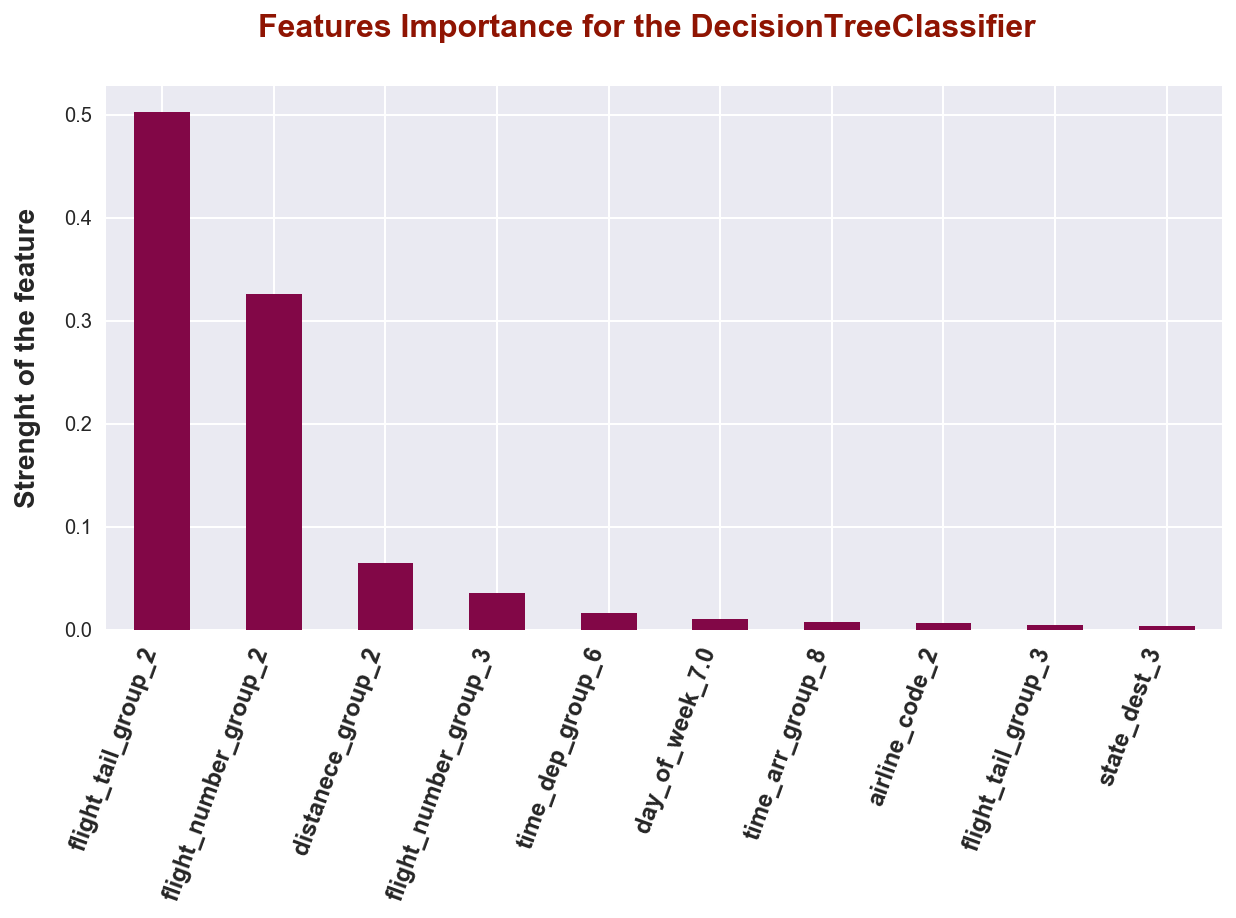

In [239]:
ax = fi.head(10).plot(kind='bar', figsize = (10,5), color=['#820747'])
ax.set_xticklabels(fi.feature)
plt.ylabel('Strenght of the feature', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=12, ha = 'right', rotation = 70, weight = 'bold')
plt.suptitle('Features Importance for the DecisionTreeClassifier', size=16, color='#8f1402', weight = 'bold')
ax.legend().set_visible(False)

plt.show()

# <span style="color:#7f7053">- Tree Visualisation for DT model.

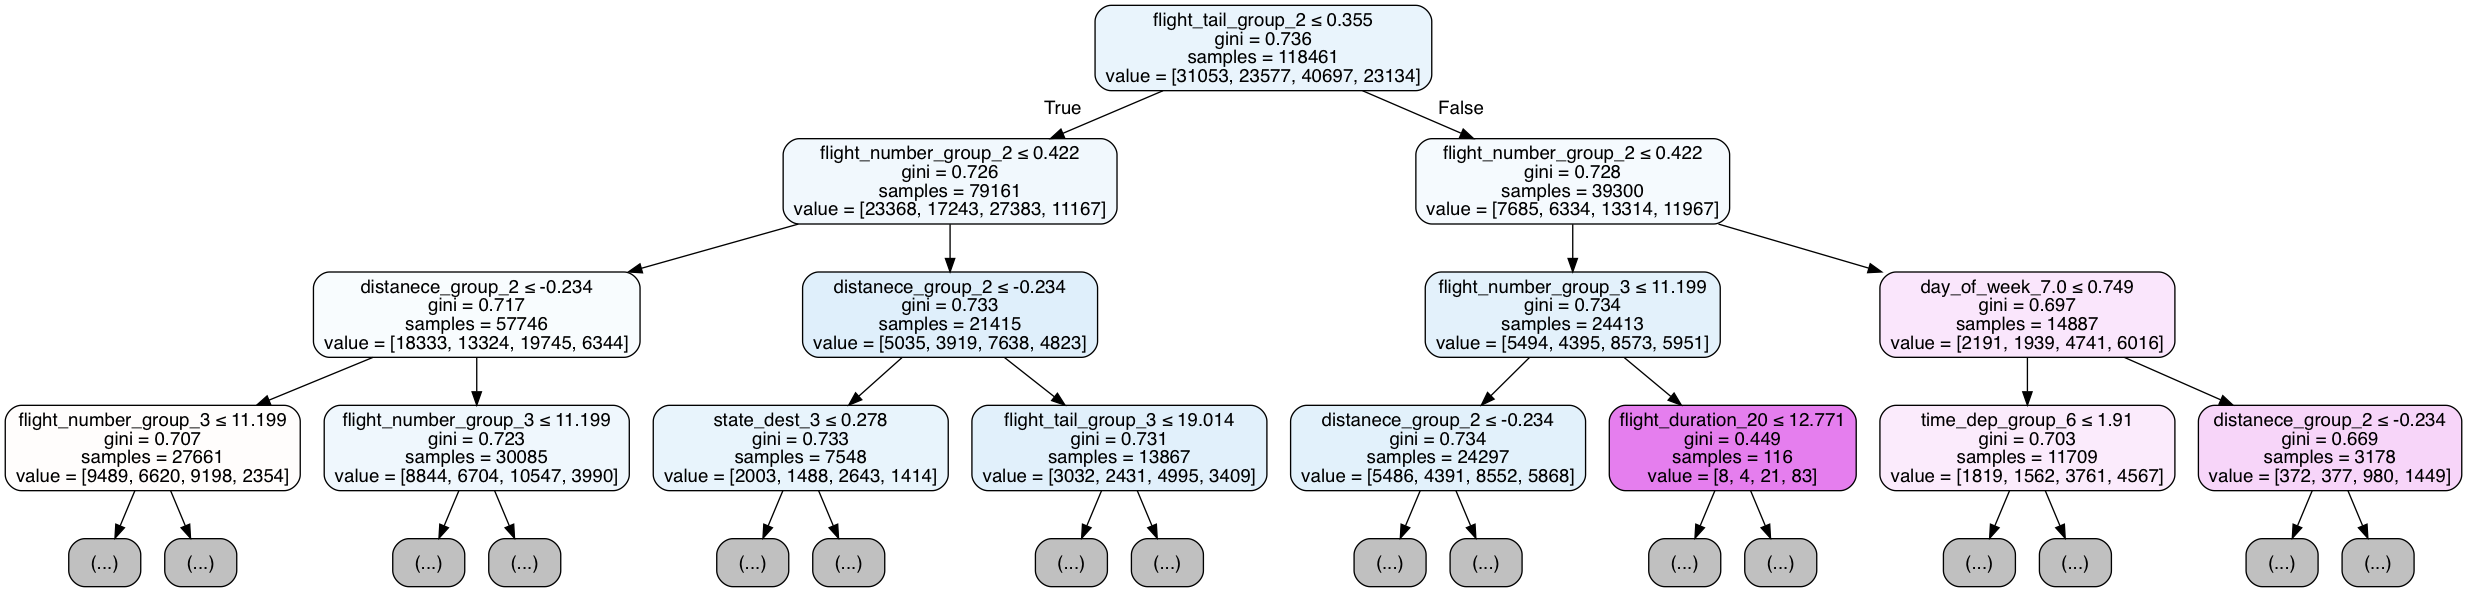

In [209]:
# initialize the output file object
# ________________________________________________________
dot_data = StringIO() 

export_graphviz(tree, out_file=dot_data, max_depth=3, filled=True, rounded=True,
                special_characters=True, feature_names=features.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Model: <span style="color:#004577">RandomForestClassifier.

<img src="img/forest.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">RandomForestClassifier is ensemble algorithm. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects. And then taking vote for final consideration of class for test object. As usual I will follow step by step in building my model and I will give some reports.

# <span style="color:#7f7053">- GridSearch for RandomForestClassifier.

In [212]:
%%time
params = {'criterion':['entropy'],
          'n_estimators':[61, 71],
          'min_samples_leaf':[4,6],
          'min_samples_split':[2], 
          'random_state':[123]}
#Making models with hyper parameters sets
Rforest_gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=2, verbose=1)
Rforest_gs.fit(X_train, yt.ravel())
print(Rforest_gs.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.4min finished


{'criterion': 'entropy', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 71, 'random_state': 123}
CPU times: user 4min 26s, sys: 3.89 s, total: 4min 30s
Wall time: 4min 31s


# <span style="color:#7f7053">- Fit Best Parameters into my RF Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Best parameters for my RandomForestClassifier: <b>{'criterion': 'entropy', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 71, 'random_state': 123}</b>. 



Check my scores with cross validation. And after that I fit my data into my model, and got result <b>0.9768 for the Train part</b>, and <b>0.9386 for the Test part</b>.

In [214]:
forest_cros = cross_val_score(RandomForestClassifier(criterion='entropy', min_samples_leaf=6, min_samples_split=2, n_estimators=71, random_state=123), X_train, yt.ravel(), cv=4)
print (forest_cros, np.mean(dtr_scores))

[ 0.36454183  0.36616579  0.36617816  0.36567164] 0.358134741091


In [221]:
%%time
# Fit my DecisionTreeClassifier model.
# ________________________________________________________
forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=6, min_samples_split=2, n_estimators=71, random_state=123)
forest.fit(X_train, yt.ravel())

CPU times: user 1min 3s, sys: 463 ms, total: 1min 4s
Wall time: 1min 5s


In [222]:
print('--------------------------------')
print("My Train Score: ", forest.score(X_train, y_train))
print('--------------------------------')
print("My Test Score: ", forest.score(X_test, ytst))
print('--------------------------------')

--------------------------------
My Train Score:  0.41480318417
--------------------------------
My Test Score:  0.367184136551
--------------------------------


# <span style="color:#7f7053">- Confusion Matrix and Classification Report for RF Model.

In [223]:
y_probs1 = forest.predict(X_test)
print(pd.DataFrame(confusion_matrix(ytst, y_probs1)))                                       
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs1), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs1))))

      0  1      2     3
0  2544  6   7365   436
1  1632  5   5837   385
2  1996  2  10472  1096
3   556  2   5675  1478


precision = 0.37, recall = 0.37, F1 = 0.37, accuracy = 0.37



# <span style="color:#7f7053">- Features Importance.

In [225]:
# Check what fitures more important for my model. 
# ________________________________________________________
fi2 = pd.DataFrame({
        'feature':features.columns,
        'importance':forest.feature_importances_
    })
fi2.sort_values('importance', ascending=False, inplace=True)
fi2.head(10)

,feature,importance
9,flight_tail_group_2,0.118190
12,flight_number_group_2,0.098650
513,distanece_group_2,0.040618
6,airline_code_2,0.016420
15,origin_airport_group_3,0.016332
21,state_dest_4,0.015697
5,day_of_week_7.0,0.015028
17,state_orig_2,0.014098
20,state_dest_3,0.013786
8,airline_code_4,0.013456


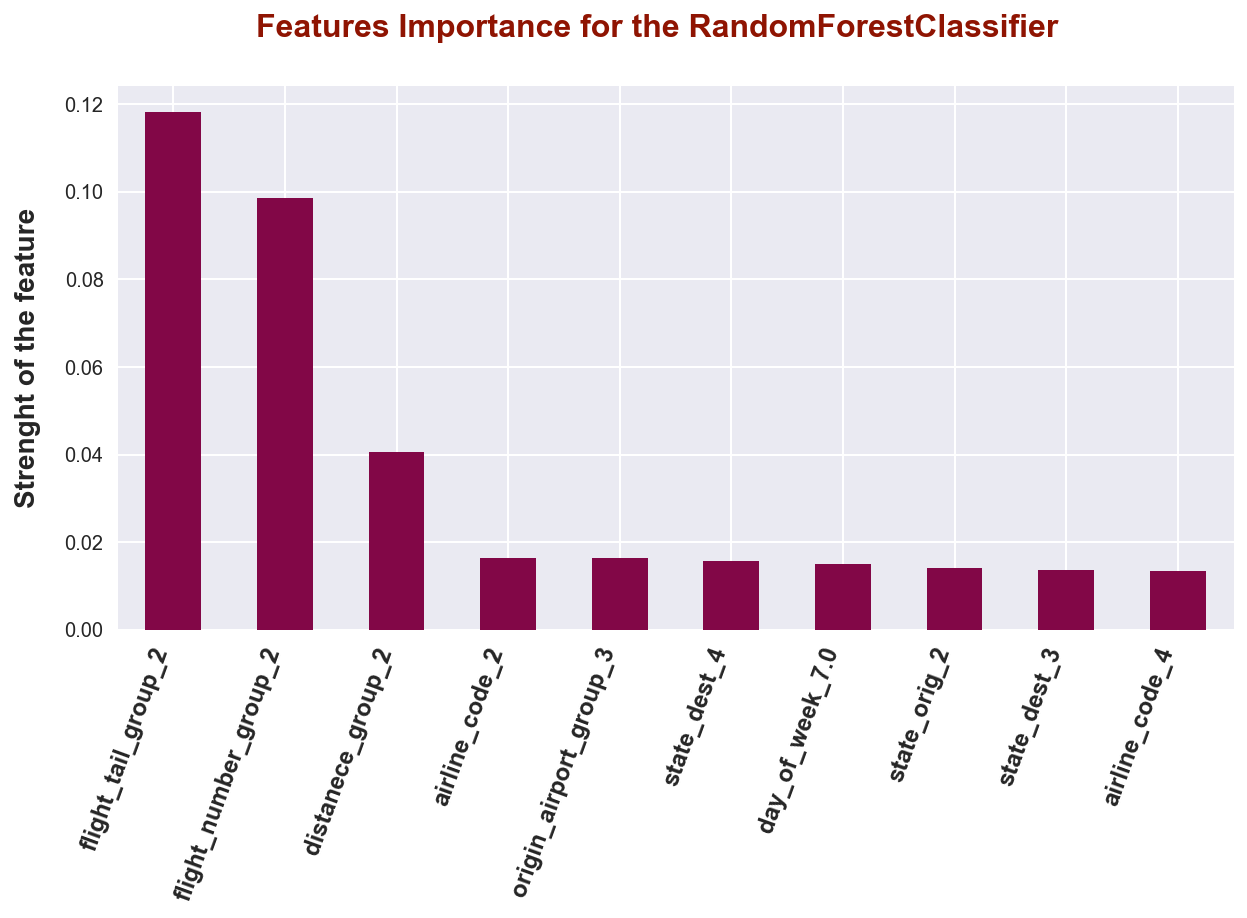

In [237]:
ax = fi2.head(10).plot(kind='bar', figsize = (10,5), color=['#820747'])
ax.set_xticklabels(fi2.feature)
plt.ylabel('Strenght of the feature', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=12, ha = 'right', rotation = 70, weight = 'bold')
plt.suptitle('Features Importance for the RandomForestClassifier', size=16, color='#8f1402', weight = 'bold')
ax.legend().set_visible(False)

plt.show()

<img src="img/lin.jpg">

<img src="img/conc.jpg">

<span style="color:#610023">In this part I built 3 working models such as LogisticRegression, DessisionTreeClasifire, RandomForestClasifire. All of the gave me result higher than baseline. As I was focusing on predicting delays more than 15 min, I can say that DesisionTreeClassifire is perfoming best, it has score <b>0.3591</b> which is slightly lower than DessisionTreeClassifire model <b>0.3671</b>. My baseline for each category below than <b>0.24</b>. Confusion matrix for the DesisionTree:<br>

   &emsp;&emsp;&emsp;   0 &emsp;&emsp; 1    &emsp;&emsp;  2  &emsp;&emsp;   3<br>
0  &emsp;1072 &emsp; 0  &emsp; 8618  &emsp; 661<br>
1  &emsp; 730 &emsp; &nbsp;0  &emsp; 6511 &emsp;  618<br>
2  &emsp;&nbsp;940 &emsp;&nbsp; 0 &emsp; 11051 &nbsp; 1575<br>
3  &emsp;&nbsp;251 &emsp; &nbsp;0  &emsp; 5403 &emsp; 2057

<span style="color:#610023">I can see that have <b>11051 correct prediction on delays from 15 - 45 minutes</b>. And prediction for last group which is 45 min and higher I got 2057 right predictions. I also do mistakes on predicting short delays, but it is not that critical, because I false predicting long delays in case when they will be shorter. 

<span style="color:#610023">I found most important features for my models which was in a top list in all my models:

<b>flight_tail_group_2</b> <span style="color:#610023">(group of plane tail numbers which was recorded with length of delays in range 28 - 56 min)</span><br>
<b>flight_number_group_2</b> <span style="color:#610023">(group of flight numbers which was recorded with length of  delays in range 28 - 56 min)</span><br>
<b>distanece_group_2</b> <span style="color:#610023">(group of distance of routes which was recorded with length of delays in range 24 - 45 min)</span><br>
<b>day_of_week_7</b> <span style="color:#610023">(group of day of the week which was recorded with length of delays more than 28 min)</span><br>
<b>airline_code_2</b> <span style="color:#610023">(group of name of airlines which was recorded with length of  delays in range 20 - 26 min)</span><br>
<b>state_dest_3</b> <span style="color:#610023">(group of states of destination which was recorded with length of  delays in range 25 - 30 min)</span><br>

<img src="img/atc.png">

<img src="img/atcl.png">

<span style="color:#610023"><b>My predictive models could be used in real life like, application for air traffic controllers, so then can monitor in real life condition of air traffic across the country. Also This application could be useful for the passengers to check the airport condition before their upcoming flight.  

<img src="img/lin.jpg">

[GO BACK <<](./Chapter-3-regression_problem.ipynb)  